In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
data = pd.read_csv("cancer.csv")
labels = np.array(data['label'])
for i in range(len(labels)):
    if labels[i] == 'M':
        labels[i] = 1
    else:
        labels[i] = 0
data = data.values
data = data[:, 1:]
data = data / np.max(data, axis=0)

In [3]:
X_train, X_eval, Y_train, Y_eval = train_test_split(data, labels, train_size=0.8)

In [4]:
X = tf.placeholder(tf.float32, shape=(None, len(data[0])))
Y = tf.placeholder(tf.float32, shape=(None, 1))
W = tf.Variable(tf.random_normal((len(data[0]), 1)), dtype=tf.float32, name='A')
B = tf.Variable(tf.random_normal((1,)), dtype=tf.float32, name='b')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
sig = tf.math.sigmoid(tf.matmul(X, W) + B) * (1 - 2 * 0.01) + 0.01
l = -tf.reduce_sum((Y * tf.log(sig) + (1 - Y) * tf.log(1 - sig)), name='l')

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(l)

In [9]:

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    curr = 100000000
    x = []
    y = []
    for i in range(100000):
        inds = np.random.choice(X_train.shape[0], 16)
        
        sess.run([optimizer], feed_dict={X: X_train[inds], Y: np.expand_dims(Y_train[inds], axis=1)})  
        if i % 500 == 0:
            inds = np.random.choice(X_eval.shape[0], 400)
            curr, = sess.run([l], feed_dict={X: X_eval[inds], Y: np.expand_dims(Y_eval[inds], axis=1)})
            x.append(i)
            y.append(curr)

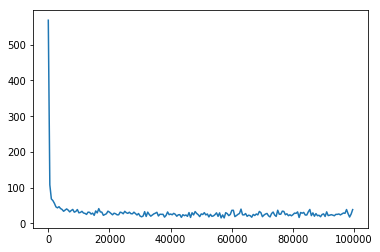

In [11]:
fig = plt.figure()
plt.plot(x, y)
plt.show()

In [11]:
data = pd.read_csv("spam.csv")
labels = np.array(data['label'])
data = data.values
data = data[:, :len(data[0]) - 1]
data = data / np.max(data, axis=0)

In [12]:
X_train, X_eval, Y_train, Y_eval = train_test_split(data, labels, train_size=0.8)

In [13]:
X = tf.placeholder(tf.float32, shape=(None, len(data[0])))
Y = tf.placeholder(tf.float32, shape=(None, 1))
W = tf.Variable(tf.random_normal((len(data[0]), 1)), dtype=tf.float32, name='A')
B = tf.Variable(tf.random_normal((1,)), dtype=tf.float32, name='b')

In [14]:
sig = tf.math.sigmoid(tf.matmul(X, W) + B) * (1 - 2 * 0.01) + 0.01
l = -tf.reduce_sum((Y * tf.log(sig) + (1 - Y) * tf.log(1 - sig)), name='l')

In [15]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(l)

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    curr = 100000000
    x = []
    y = []
    for i in range(100000):
        inds = np.random.choice(X_train.shape[0], 16)
        
        sess.run([optimizer], feed_dict={X: X_train[inds], Y: np.expand_dims(Y_train[inds], axis=1)})  
        if i % 500 == 0:
            inds = np.random.choice(X_eval.shape[0], 400)
            curr, = sess.run([l], feed_dict={X: X_eval[inds], Y: np.expand_dims(Y_eval[inds], axis=1)})
            x.append(i)
            y.append(curr)

In [1]:
fig = plt.figure()
plt.plot(x, y)
plt.show()

NameError: name 'plt' is not defined